<a href="https://colab.research.google.com/github/metehanunal0/ML-Regression/blob/main/MLReg_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detect Outliers

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [ ]:
df = pd.read_csv("/content/regressionTrain.csv")
df.head()

,Price,Year,Type,Shift,km,Power,Engine,Seller
0,24900,2004,Diesel,Manual,270000,70,1248,Dealer
1,27500,2004,Gasoline,Manual,164000,75,1199,Dealer
2,42500,2008,Diesel,Auto,300000,90,1248,Dealer
3,63750,2017,Gasoline,Auto,8780,90,1398,Dealer
4,25000,2004,Diesel,Manual,200000,70,1248,Owner


***Outlier Detection for Year***


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


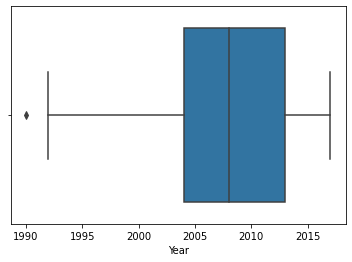

In [ ]:
# VISUALIZED #
sns.boxplot(df['Year'])

In [ ]:
# ** SEEMS OK ** #

***Outlier Detection for KM***

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


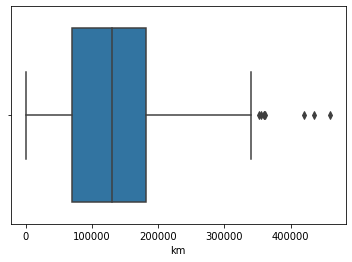

In [ ]:
# VISUALIZED #
sns.boxplot(df['km'])

In [ ]:
print(np.where(df['km']>350000))

(array([ 242,  327,  424, 1194, 1390, 1570, 1800, 2092]),)


In [ ]:
# z-Score test #
z = np.abs(stats.zscore(df['km']))
threshold=3
ls = df.loc[np.where(z>3)]
print(np.where(z>3))

(array([ 242,  327,  424, 1194, 1390, 1570, 1800, 2092]),)


In [ ]:
# *** INVESTIGATING OUTLIER KM DATA IF THEY ARE FRAUD. ***
sub = pd.DataFrame(ls)
print(sub)

      Price  Year    Type   Shift      km  Power  Engine  Seller
242   25750  2005  Diesel  Manual  420000     70    1248   Owner
327   27900  2007  Diesel  Manual  361000     51    1201  Dealer
424   26000  2004  Diesel  Manual  360000     70    1248   Owner
1194  21000  2003  Diesel  Manual  435000     70    1248   Owner
1390  25500  2005     LPG  Manual  360000     51    1201   Owner
1570  33500  2012  Diesel  Manual  352800     75    1248  Dealer
1800  16750  2003  Diesel  Manual  355000    126    1601   Owner
2092   9200  1990     LPG  Manual  460000     51    1201  Dealer


In [ ]:
# *** SEEMS OK *** #

***Outlier Detection for POWER***

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


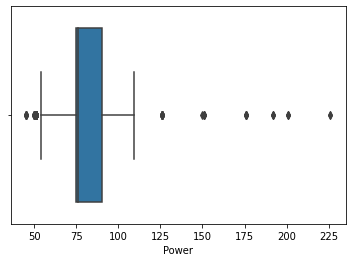

In [ ]:
# VISUALIZED #
sns.boxplot(df['Power'])

In [ ]:
print(np.where(df['Power']>220))

(array([ 479, 2172]),)


In [ ]:
df.loc[2172]

Price      28900
Year        2003
Type      Diesel
Shift     Manual
km        264000
Power        226
Engine      1601
Seller     Owner
Name: 2172, dtype: object

In [ ]:
# ** PRICE IN MID RANGE ALTHOUGH HIGH POWER AND ENGINE BECAUSE CAR IS OLD. SEEMS OK ** #

***Outlier Detection for ENGINE***

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


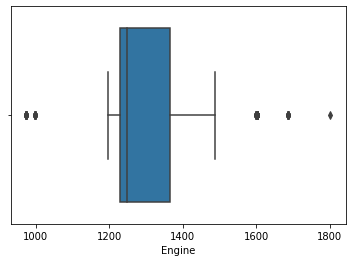

In [ ]:
# VISUALIZED #
sns.boxplot(df['Engine'])

In [ ]:
# ***** SEEMS OK. NO NEED TO DROP DATA ***** #

Outlier Detection for PRICE

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


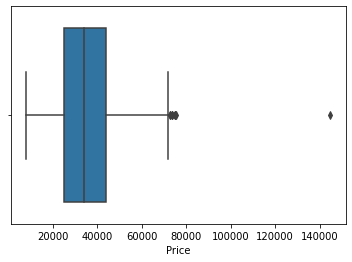

In [ ]:
# VISUALIZED #
sns.boxplot(df['Price'])

In [ ]:
df.loc[np.where(df['Price']>100000)] # monitoring the suspicious fraud data

,Price,Year,Type,Shift,km,Power,Engine,Seller
647,144750,2008,Gasoline,Manual,118000,76,1201,Owner


In [ ]:
# ***** SEEMS FRAUD. NEED TO BE REMOVED *****
dfnew = df.drop(df.index[[647]]) # removing fraud raw
dfnew.loc[645:649] # monitoring
# we removed fraud data and will see how this data would affect our model by creating new dataframe


,Price,Year,Type,Shift,km,Power,Engine,Seller
645,36500,2013,LPG,Auto,40000,100,1364,Dealer
646,43750,2013,Diesel,Manual,91000,75,1248,Dealer
648,42000,2012,Diesel,Manual,123233,75,1248,Owner
649,21250,2003,Diesel,Manual,223000,101,1601,Owner


In [ ]:
dfnew.reset_index(drop=True, inplace=True) # after removal we have to reset index
dfnew.loc[645:648] # monitoring changes

,Price,Year,Type,Shift,km,Power,Engine,Seller
645,36500,2013,LPG,Auto,40000,100,1364,Dealer
646,43750,2013,Diesel,Manual,91000,75,1248,Dealer
647,42000,2012,Diesel,Manual,123233,75,1248,Owner
648,21250,2003,Diesel,Manual,223000,101,1601,Owner


# Encoding Train DS --> Use "modeldf" as xTRAIN DF


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [ ]:
dfnew.dtypes # encoding will be applied on object types

Price      int64
Year       int64
Type      object
Shift     object
km         int64
Power      int64
Engine     int64
Seller    object
dtype: object

In [ ]:
dfnew["Type"].unique() # getting new column's names

array(['Diesel', 'Gasoline', 'LPG'], dtype=object)

In [ ]:
dfnew["Shift"].unique()

array(['Manual', 'Auto'], dtype=object)

In [ ]:
dfnew["Seller"].unique()

array(['Dealer', 'Owner'], dtype=object)

In [ ]:
ohe = OneHotEncoder() # assigning an object from OneHotEncoder class

In [ ]:
ohe.fit_transform(dfnew[["Type","Shift","Seller"]]).toarray() # performs encoding in order to get rid of string values

array([[1., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [ ]:
features_array = ohe.fit_transform(dfnew[["Type","Shift","Seller"]]).toarray()

In [ ]:
features_labels = ohe.categories_ # assigning label names in order to paste new features array

In [ ]:
np.hstack(features_labels).ravel() # gathering all labels around in one array

array(['Diesel', 'Gasoline', 'LPG', 'Auto', 'Manual', 'Dealer', 'Owner'],
      dtype=object)

In [ ]:
features_labels = np.hstack(features_labels).ravel()

In [ ]:
print(features_labels) # feature's labels are ready to go!

['Diesel' 'Gasoline' 'LPG' 'Auto' 'Manual' 'Dealer' 'Owner']


In [ ]:
pd.DataFrame(features_array, columns = features_labels)

,Diesel,Gasoline,LPG,Auto,Manual,Dealer,Owner
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
2894,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2895,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2896,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2897,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
encdf = pd.DataFrame(features_array, columns = features_labels) # creating new dataframe as encdf which means encoded df

In [ ]:
encdf.tail()

,Diesel,Gasoline,LPG,Auto,Manual,Dealer,Owner
2894,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2895,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2896,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2897,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2898,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
dfnew.tail() # comparing encoding results if there is no fail

,Price,Year,Type,Shift,km,Power,Engine,Seller
2894,12000,1993,LPG,Manual,187000,76,1201,Owner
2895,42500,2009,Gasoline,Auto,68500,80,1229,Owner
2896,35750,2012,LPG,Manual,142257,100,1364,Owner
2897,34750,2010,Diesel,Manual,135000,90,1248,Dealer
2898,40500,2014,Diesel,Manual,131500,75,1248,Dealer


In [ ]:
pd.concat([dfnew, encdf], axis=1).tail() # concatinating encoded df and main df so that we obtain main df, where we use model at.

,Price,Year,Type,Shift,km,Power,Engine,Seller,Diesel,Gasoline,LPG,Auto,Manual,Dealer,Owner
2894,12000,1993,LPG,Manual,187000,76,1201,Owner,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2895,42500,2009,Gasoline,Auto,68500,80,1229,Owner,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2896,35750,2012,LPG,Manual,142257,100,1364,Owner,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2897,34750,2010,Diesel,Manual,135000,90,1248,Dealer,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2898,40500,2014,Diesel,Manual,131500,75,1248,Dealer,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
alldf = pd.concat([dfnew, encdf], axis=1)

In [ ]:
# ***** drop columns that we no longer need so that we use dummy encoded array ***** #
modeldf = alldf.drop(['Type', 'Shift','Seller'], axis=1, inplace=False)
modeldf.tail()

,Price,Year,km,Power,Engine,Diesel,Gasoline,LPG,Auto,Manual,Dealer,Owner
2894,12000,1993,187000,76,1201,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2895,42500,2009,68500,80,1229,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2896,35750,2012,142257,100,1364,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2897,34750,2010,135000,90,1248,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2898,40500,2014,131500,75,1248,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
modeldf.describe()

,Price,Year,km,Power,Engine,Diesel,Gasoline,LPG,Auto,Manual,Dealer,Owner
count,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000
mean,35298.758882,2007.521559,128190.150742,79.798896,1289.185926,0.383925,0.390479,0.225595,0.327354,0.672646,0.436357,0.563643
std,12620.245325,5.928182,71869.549924,15.428454,101.219832,0.486424,0.487942,0.418046,0.469329,0.469329,0.496019,0.496019
min,7950.000000,1990.000000,0.000000,45.000000,973.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25000.000000,2004.000000,70000.000000,75.000000,1229.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34000.000000,2008.000000,130000.000000,76.000000,1248.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,43900.000000,2013.000000,181500.000000,90.000000,1364.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,75500.000000,2017.000000,460000.000000,226.000000,1801.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
modeldf.corr()

,Price,Year,km,Power,Engine,Diesel,Gasoline,LPG,Auto,Manual,Dealer,Owner
Price,1.000000,0.899913,-0.789367,0.254901,-0.038401,-0.021547,0.332291,-0.362778,0.372858,-0.372858,0.145065,-0.145065
Year,0.899913,1.000000,-0.696328,0.184035,-0.164354,0.166155,0.233287,-0.465624,0.177978,-0.177978,0.155985,-0.155985
km,-0.789367,-0.696328,1.000000,-0.198678,0.060034,0.264907,-0.496541,0.271324,-0.332842,0.332842,-0.090450,0.090450
Power,0.254901,0.184035,-0.198678,1.000000,0.478907,-0.198088,0.174988,0.026243,0.199045,-0.199045,0.033159,-0.033159
Engine,-0.038401,-0.164354,0.060034,0.478907,1.000000,-0.134148,-0.015178,0.173806,0.108400,-0.108400,0.000335,-0.000335
Diesel,-0.021547,0.166155,0.264907,-0.198088,-0.134148,1.000000,-0.631847,-0.426076,-0.402582,0.402582,0.003338,-0.003338
Gasoline,0.332291,0.233287,-0.496541,0.174988,-0.015178,-0.631847,1.000000,-0.432002,0.407492,-0.407492,0.095585,-0.095585
LPG,-0.362778,-0.465624,0.271324,0.026243,0.173806,-0.426076,-0.432002,1.000000,-0.007193,0.007193,-0.115452,0.115452
Auto,0.372858,0.177978,-0.332842,0.199045,0.108400,-0.402582,0.407492,-0.007193,1.000000,-1.000000,0.127322,-0.127322
Manual,-0.372858,-0.177978,0.332842,-0.199045,-0.108400,0.402582,-0.407492,0.007193,-1.000000,1.000000,-0.127322,0.127322


# Encoding Test DS --> Use "modeldftest" as xTEST DF


Assignment 2 - Question 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [ ]:
testdf= pd.read_csv("/content/regressionTest.csv")
testdf.head()

,Year,Type,Shift,km,Power,Engine,Seller
0,2013,Diesel,Manual,60000,75,1248,Owner
1,2004,Gasoline,Manual,108000,80,1229,Dealer
2,2005,Gasoline,Manual,134500,80,1229,Owner
3,2000,LPG,Manual,200000,90,1389,Dealer
4,2003,Diesel,Manual,168000,51,1601,Owner


In [ ]:
testdf.dtypes # encoding will be applied on object types

Year       int64
Type      object
Shift     object
km         int64
Power      int64
Engine     int64
Seller    object
dtype: object

In [ ]:
testdf.shape

(94, 7)

In [ ]:
testdf["Type"].unique() # getting new column's names

array(['Diesel', 'Gasoline', 'LPG'], dtype=object)

In [ ]:
testdf["Shift"].unique()

array(['Manual', 'Auto'], dtype=object)

In [ ]:
testdf["Seller"].unique()

array(['Owner', 'Dealer'], dtype=object)

In [ ]:
ohe2 = OneHotEncoder() # assigning an object from OneHotEncoder class

In [ ]:
ohe2.fit_transform(testdf[["Type","Shift","Seller"]]).toarray() # performs encoding in order to get rid of string values

array([[1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 1., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 1., 1., 0., 0., 1.],
 

In [ ]:
ft_arraytest = ohe2.fit_transform(testdf[["Type","Shift","Seller"]]).toarray() # fittin and transforming categorig features into array

In [ ]:
ft_labeltest = ohe2.categories_ # assigning label names in order to paste new features array

In [ ]:
np.hstack(ft_labeltest).ravel() # gathering all labels around in one array

array(['Diesel', 'Gasoline', 'LPG', 'Auto', 'Manual', 'Dealer', 'Owner'],
      dtype=object)

In [ ]:
ft_labeltest = np.hstack(ft_labeltest).ravel()

In [ ]:
print(ft_labeltest) # feature's labels are ready to go

['Diesel' 'Gasoline' 'LPG' 'Auto' 'Manual' 'Dealer' 'Owner']


In [ ]:
pd.DataFrame(ft_arraytest, columns = ft_labeltest) # creating dataframe and colaborating array values and theirs labels

,Diesel,Gasoline,LPG,Auto,Manual,Dealer,Owner
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
89,1.0,0.0,0.0,0.0,1.0,0.0,1.0
90,0.0,1.0,0.0,1.0,0.0,1.0,0.0
91,0.0,1.0,0.0,1.0,0.0,0.0,1.0
92,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [ ]:
testdfend = pd.DataFrame(ft_arraytest, columns = ft_labeltest) # creating new dataframe as encdf which means encoded df

In [ ]:
testdfend.tail()

,Diesel,Gasoline,LPG,Auto,Manual,Dealer,Owner
89,1.0,0.0,0.0,0.0,1.0,0.0,1.0
90,0.0,1.0,0.0,1.0,0.0,1.0,0.0
91,0.0,1.0,0.0,1.0,0.0,0.0,1.0
92,0.0,0.0,1.0,0.0,1.0,1.0,0.0
93,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
testdf.tail() # comparing encoding results if there is no fail

,Year,Type,Shift,km,Power,Engine,Seller
89,2004,Diesel,Manual,202000,70,1248,Owner
90,2012,Gasoline,Auto,70000,85,1229,Dealer
91,2012,Gasoline,Auto,27000,100,1364,Owner
92,1997,LPG,Manual,186000,90,1389,Dealer
93,2011,Diesel,Manual,130000,75,1248,Owner


In [ ]:
pd.concat([testdf, testdfend], axis=1).tail() # concatinating encoded df and main df so that we obtain main df, where we use model at.

,Year,Type,Shift,km,Power,Engine,Seller,Diesel,Gasoline,LPG,Auto,Manual,Dealer,Owner
89,2004,Diesel,Manual,202000,70,1248,Owner,1.0,0.0,0.0,0.0,1.0,0.0,1.0
90,2012,Gasoline,Auto,70000,85,1229,Dealer,0.0,1.0,0.0,1.0,0.0,1.0,0.0
91,2012,Gasoline,Auto,27000,100,1364,Owner,0.0,1.0,0.0,1.0,0.0,0.0,1.0
92,1997,LPG,Manual,186000,90,1389,Dealer,0.0,0.0,1.0,0.0,1.0,1.0,0.0
93,2011,Diesel,Manual,130000,75,1248,Owner,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
alldfend = pd.concat([testdf, testdfend], axis=1)

In [ ]:
# ***** drop columns that we no longer need so that we use dummy encoded array ***** #
modeldftest = alldfend.drop(['Type', 'Shift','Seller'], axis=1, inplace=False)
modeldftest.tail()

,Year,km,Power,Engine,Diesel,Gasoline,LPG,Auto,Manual,Dealer,Owner
89,2004,202000,70,1248,1.0,0.0,0.0,0.0,1.0,0.0,1.0
90,2012,70000,85,1229,0.0,1.0,0.0,1.0,0.0,1.0,0.0
91,2012,27000,100,1364,0.0,1.0,0.0,1.0,0.0,0.0,1.0
92,1997,186000,90,1389,0.0,0.0,1.0,0.0,1.0,1.0,0.0
93,2011,130000,75,1248,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
modeldftest.describe() # summary of dataframe. Last controls are performed.

,Year,km,Power,Engine,Diesel,Gasoline,LPG,Auto,Manual,Dealer,Owner
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,2007.021277,132508.531915,78.638298,1282.202128,0.372340,0.414894,0.212766,0.287234,0.712766,0.329787,0.670213
std,5.782768,68157.985124,12.933952,104.578784,0.486021,0.495346,0.411458,0.454898,0.454898,0.472657,0.472657
min,1994.000000,10000.000000,45.000000,999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,83750.000000,75.000000,1229.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,134750.000000,76.000000,1248.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,2012.000000,186750.000000,90.000000,1364.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,2017.000000,275000.000000,115.000000,1686.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Train - Test Split for applications on xTRAIN DF



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = modeldf.drop("Price", axis=1) # determining features of dataset
y = modeldf["Price"]

In [ ]:
# ****** SCALING Y VALUES HELPS US TO DECREASE MSE ****** #
# ******************************************************* #
#from sklearn.preprocessing import StandardScaler
#hh = StandardScaler()
#y = hh.fit_transform(y.to_frame().to_numpy())
#y = pd.DataFrame(y, columns=['Price'])
#y = y.squeeze()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (2029, 11)
x test:  (870, 11)
y train:  (2029,)
y test:  (870,)


# Train Test Split for Assignment

In [ ]:
X_train = modeldf.drop("Price", axis=1) # classifying dataset
X_test = modeldftest
y_train = modeldf["Price"]

print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)

x train:  (2899, 11)
x test:  (94, 11)
y train:  (2899,)
y test:  (0,)


<ipython-input-279-c531b2f8c67f>:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_test = pd.Series()


# Model Creation/Evolution

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
CV = []
R2_train = []
R2_test = []

# defining function in order not to overwrite
def price_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)

    # R2 score of TRAIN set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    mse_train_model = mean_squared_error(y_train, y_pred_train)
    mae_train_model = mean_absolute_error(y_train,y_pred_train)

    # R2 score of TEST set  --/-- saving prediction results
    y_pred_test = model.predict(X_test)
    #np.savetxt('Results.txt', y_pred_test, '%.3f')
    #R2_test_model = r2_score(y_test,y_pred_test)
    #R2_test.append(round(R2_test_model,3))
    #mse_test_model = mean_squared_error(y_test.values, np.round(y_pred_test,3))
    #mae_test_model = mean_absolute_error(y_test,y_pred_test)

    # R2 mean of TRAIN set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,3))

    # Printing results
    print("Train R2-score :",round(R2_train_model,3))
    #print("Test R2-score :",round(R2_test_model,3))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,3))
    print("Train MSE :", round(mse_train_model,3))
    #print("Test MSE :", round(mse_test_model,3))
    #print("Y test :", y_test.values[:5])
    #print("Y pred test :", np.round(y_pred_test[:5],2))
    print("Train MAE :", round(mae_train_model,3))
    #print("Test MAE :", round(mae_test_model,3))


    # Plotting Graphs
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False, ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')

    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')

    plt.show()

Model 1 : KNN Regression

[44986.66666667 35759.93333333 34396.66666667 25030.
 28210.         57373.33333333 39410.         34176.66666667
 41560.         29890.         55353.33333333 26190.
 54603.33333333 38656.66666667 20980.         38559.93333333
 29923.33333333 27896.66666667 23226.6        44900.
 49290.         30617.2        20980.         44616.66666667
 25280.         23476.66666667 42173.33333333 22263.33333333
 22856.66666667 22826.66666667 25280.         54016.66666667
 44616.66666667 58190.         35670.         21309.93333333
 51759.86666667 36776.66666667 38193.33333333 31236.66666667
 25626.66666667 33356.6        33970.         21076.66666667
 45863.33333333 45270.         31083.26666667 39193.33333333
 30770.         35393.33333333 53153.33333333 45420.
 34036.66666667 42946.66666667 24710.         27933.33333333
 25223.33333333 59233.33333333 29426.66666667 44686.66666667
 36776.66666667 23006.         31326.66666667 32799.93333333
 27426.66666667 53976.66666667 25103.33333333 46683.3333

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


ValueError: ignored

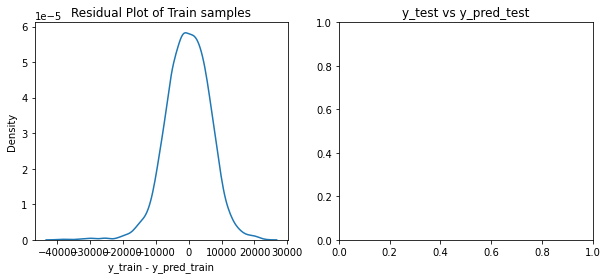

In [ ]:
# Creating KNN model object
knn = KNeighborsRegressor(15)

price_pred_model(knn,"knn_model")

Model 2 : Ridge Regression

Train R2-score : 0.891
Test R2-score : 0.894
Train CV scores : [0.87220268 0.89675058 0.91470368 0.87367336 0.88857458]
Train CV mean : 0.889
Train MSE : 17185817.565
Test MSE : 17269560.567
Train MAE : 3004.47
Test MAE : 3089.618


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


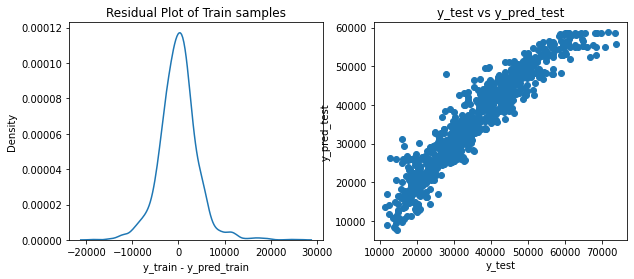

In [ ]:
# Creating Ridge model object
rg = Ridge()
# range of alpha
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
ridge_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

price_pred_model(ridge_rs,"ridge_model")

Residual plot of samples shows density of error. The more density of 0 indicates the better model was evaluated.

Model 3 : Lasso Regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.507e+08, tolerance: 3.005e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.507e+08, tolerance: 3.005e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.508e+08, tolerance: 3.005e+07

Train R2-score : 0.892
Train CV scores : [0.89275375 0.88752726 0.89160624 0.88919736 0.89106626]
Train CV mean : 0.89
Train MSE : 17167222.032
Train MAE : 3027.334


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


ValueError: ignored

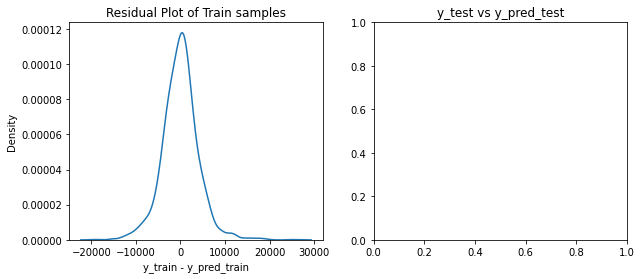

In [ ]:
ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

lasso_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

price_pred_model(lasso_rs,"lasso_model")